In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as mpe

# Air pollution data

In [2]:
# load dataset
data= pd.read_csv('data/pollution_1997_2006.tsv', sep='\t')
data.head()

,date,concentration,rain,wind_speed,temperature,umidity
0,9/23/1997,40.58,2.4,1.9,24.4,54.7
1,9/25/1997,25.17,0.0,2.5,20.2,91.0
2,9/30/1997,44.63,2.2,3.7,23.7,77.0
3,10/4/1997,38.62,0.0,4.0,23.3,53.7
4,10/8/1997,27.66,0.0,0.2,25.7,66.7


In [4]:
# chart style
CAPSTYLE="projecting"
COLORMAP="magma_r"

LINEWIDTH=16
EDGEWIDTH=0
INNERWIDTH=5
ALPHA=1
FIRSTMONTH=0 # 0=Jan, 11=Dec

In [5]:
# parse time
data['date']= data['date'].apply(pd.to_datetime)

# set origin at the first day
first_day= data['date'].min()
origin= (first_day - pd.to_timedelta(first_day.day - FIRSTMONTH, unit='d'))
months= pd.date_range('2024-01-01', '2024-12-31', freq='MS').strftime("%b").tolist()

# convert concentration timestamps to year fractions
temp= data.loc[1:,'date'].reset_index(drop=True)
data.drop(data.index[-1], inplace=True)
data['date_next']= temp

data['start']= (data['date'] - origin) / np.timedelta64(1, 'Y')
data['stop'] = ((data['date_next']) - origin) / np.timedelta64(1, 'Y')

data.head()

,date,concentration,rain,wind_speed,temperature,umidity,date_next,start,stop
0,1997-09-23,40.58,2.4,1.9,24.4,54.7,1997-09-25,0.062972,0.068448
1,1997-09-25,25.17,0.0,2.5,20.2,91.0,1997-09-30,0.068448,0.082137
2,1997-09-30,44.63,2.2,3.7,23.7,77.0,1997-10-04,0.082137,0.093089
3,1997-10-04,38.62,0.0,4.0,23.3,53.7,1997-10-08,0.093089,0.104040
4,1997-10-08,27.66,0.0,0.2,25.7,66.7,1997-10-09,0.104040,0.106778


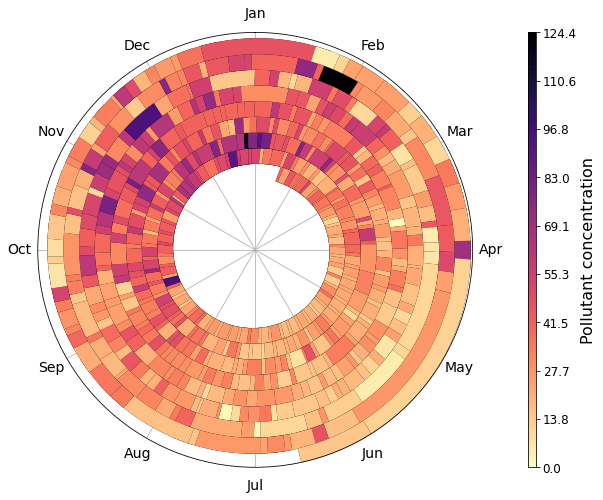

In [7]:
fig= plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection="polar")

for idx, event in data.iterrows():
    # sample normalized concentration colormap
    concentration= event['concentration'] / data['concentration'].max()
    color= plt.cm.get_cmap(COLORMAP)(concentration)
    tstart, tstop = event.loc[['start', 'stop']]
    
    # timestamps are in year fractions, 2pi is one year
    nsamples= int(1000. * (tstop - tstart))
    t= np.linspace(tstart, tstop, nsamples)
    theta= 2 * np.pi * t
    arc,= ax.plot(theta, t, lw=LINEWIDTH, color=color, solid_capstyle=CAPSTYLE, alpha=ALPHA)
    arc.set_path_effects([mpe.Stroke(linewidth=LINEWIDTH+EDGEWIDTH, foreground='black'), mpe.Normal()])

# grid and labels
ax.set_rticks([])
ax.set_rlim(bottom=-INNERWIDTH)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_xticks(np.linspace(0, 2*np.pi, len(months), endpoint=False))
ax.set_xticklabels(months)
ax.tick_params('x', pad=8)
ax.xaxis.set_tick_params(labelsize=14)
ax.grid(True)

# setup the colorbar
cmin= data['concentration'].min()
cmax= data['concentration'].max()
norm= mpl.colors.Normalize(vmin=cmin, vmax=cmax)
sm= plt.cm.ScalarMappable(cmap=COLORMAP, norm=norm)
sm.set_array([])
cbar= plt.colorbar(sm, ticks=np.linspace(cmin, cmax, 10), fraction=0.04, aspect=60, pad=0.1, ax=ax)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='Pollutant concentration', size=16)

#plt.savefig('ring_chart_air.pdf', pad_inches=0, bbox_inches="tight")

# Seattle temperature

In [8]:
data= pd.read_csv('data/seattleWeather_1948-2017.csv')

data.columns= [x.lower() for x in data.columns]

# parse time
data['date']= data['date'].apply(pd.to_datetime)

start_date= '2007-01-01'

data= data.loc[(data['date']> start_date)].reset_index(drop=True)
data.head()

,date,prcp,tmax,tmin,rain
0,2007-01-02,1.77,56,45,True
1,2007-01-03,1.01,48,40,True
2,2007-01-04,0.15,42,30,True
3,2007-01-05,0.77,43,31,True
4,2007-01-06,0.03,44,36,True


In [9]:
# chart style
CAPSTYLE="projecting"
COLORMAP="coolwarm"

LINEWIDTH=13
EDGEWIDTH=0
INNERWIDTH=5
ALPHA=1
FIRSTMONTH=0 # 0=Jan, 11=Dec

In [10]:
# set origin at the first day
first_day= data['date'].min()
origin= (first_day - pd.to_timedelta(first_day.day - FIRSTMONTH, unit='d'))
months= pd.date_range('2024-01-01', '2024-12-31', freq='MS').strftime("%b").tolist()

# convert temperatures timestamps to year fractions
temp= data.loc[1:,'date'].reset_index(drop=True)
data.drop(data.index[-1], inplace=True)
data['date_next']= temp

data['start']= (data['date'] - origin) / np.timedelta64(1, 'Y')
data['stop'] = ((data['date_next']) - origin) / np.timedelta64(1, 'Y')

data.head()

,date,prcp,tmax,tmin,rain,date_next,start,stop
0,2007-01-02,1.77,56,45,True,2007-01-03,0.005476,0.008214
1,2007-01-03,1.01,48,40,True,2007-01-04,0.008214,0.010952
2,2007-01-04,0.15,42,30,True,2007-01-05,0.010952,0.013690
3,2007-01-05,0.77,43,31,True,2007-01-06,0.013690,0.016427
4,2007-01-06,0.03,44,36,True,2007-01-07,0.016427,0.019165


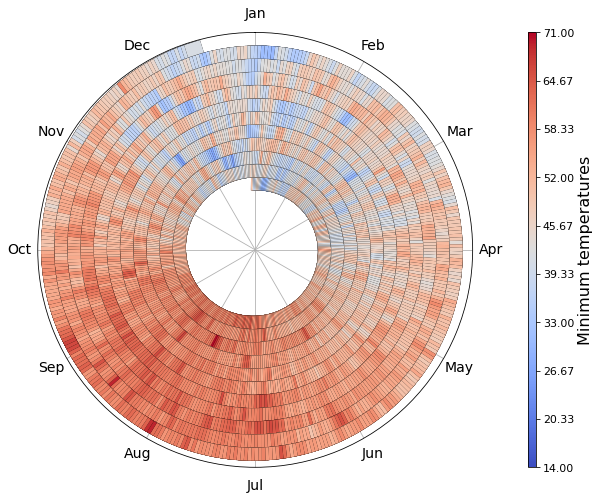

In [11]:
fig= plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection="polar")

for idx, event in data.iterrows():
    # sample normalized tmin colormap
    tmin= event['tmin'] / data['tmin'].max()
    color= plt.cm.get_cmap(COLORMAP)(tmin)
    tstart, tstop = event.loc[['start', 'stop']]
    
    # timestamps are in year fractions, 2pi is one year
    nsamples= int(1000. * (tstop - tstart))
    t= np.linspace(tstart, tstop, nsamples)
    theta= 2 * np.pi * t
    arc,= ax.plot(theta, t, lw=LINEWIDTH, color=color, solid_capstyle=CAPSTYLE, alpha=ALPHA)
    arc.set_path_effects([mpe.Stroke(linewidth=LINEWIDTH+EDGEWIDTH, foreground='black'), mpe.Normal()])

# grid and labels
ax.set_rticks([])
ax.set_rlim(bottom=-INNERWIDTH)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_xticks(np.linspace(0, 2*np.pi, len(months), endpoint=False))
ax.set_xticklabels(months)
ax.tick_params('x', pad=8)
ax.xaxis.set_tick_params(labelsize=14)
ax.grid(True)

# setup the colorbar
tmin= data['tmin'].min()
tmax= data['tmin'].max()
norm= mpl.colors.Normalize(vmin=tmin, vmax=tmax)
sm= plt.cm.ScalarMappable(cmap=COLORMAP, norm=norm)
sm.set_array([])
cbar= plt.colorbar(sm, ticks=np.linspace(tmin, tmax, 10), fraction=0.04, aspect=60, pad=0.1, ax=ax)
cbar.ax.tick_params(labelsize=11)
cbar.set_label(label='Minimum temperatures', size=16)

#plt.savefig('ring_chart_temp.pdf', pad_inches=0, bbox_inches="tight")